# Importing the Libraries 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# For visuals
sns.set(style="whitegrid")


# Loading the Dataset

In [6]:
df = pd.read_csv(r"C:\Users\rehan\OneDrive\Desktop\dataset.csv")
df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Data Preprocessing

In [4]:
# Checking for missing values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
#Checking for zero values in 'cholesterol' and 'resting bp s'
df[['resting bp s', 'cholesterol']].describe()
print("Zero resting bp:", sum(df['resting bp s'] == 0))
print("Zero cholesterol:", sum(df['cholesterol'] == 0))


Zero resting bp: 1
Zero cholesterol: 172


# Exploratory Data  Analysis

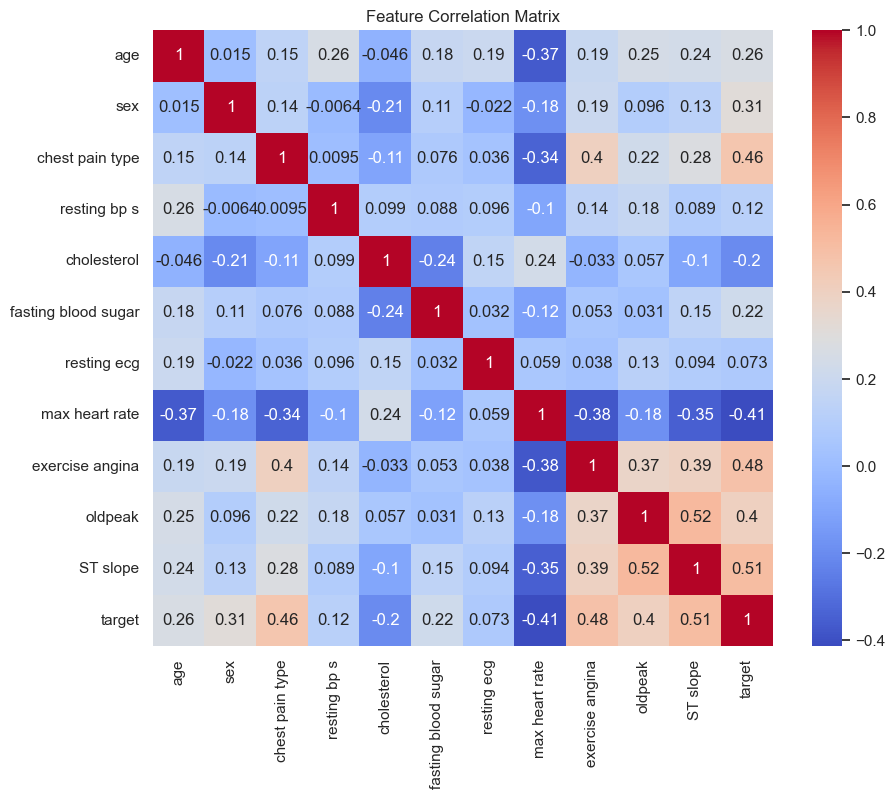

In [21]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


Text(0.5, 1.0, 'Distribution of Heart Disease (1 = Yes, 0 = No)')

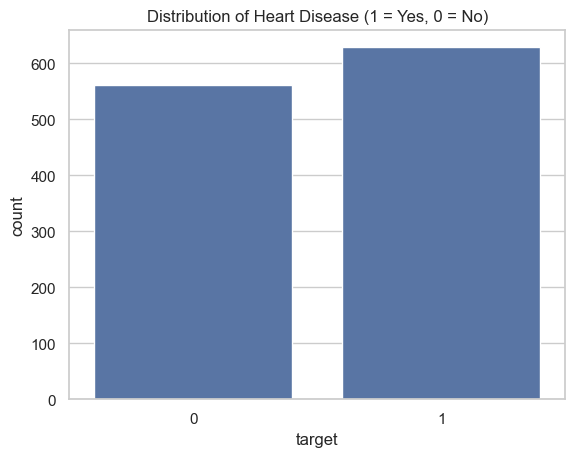

In [27]:
# Countplot for target
sns.countplot(data=df, x='target')
plt.title("Distribution of Heart Disease (1 = Yes, 0 = No)")

# Feature Encoding

In [30]:
# Encode Nominal Categorical Features
df = pd.get_dummies(df, columns=['chest pain type', 'resting ecg', 'ST slope'], drop_first=True)
df.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,True,False,False,False,False,True,False,False
1,49,0,160,180,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,True,False,True,False,False
3,48,0,138,214,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,False,False,True,False,False


# Split the Dataset

In [50]:
# Train-Test Split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation 

## logistic Regression

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

[[ 89  18]
 [ 13 118]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       107
           1       0.87      0.90      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

ROC AUC Score: 0.8662695298566027
